/Users/vinoth/opt/anaconda3/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)
  0%|          | 0/1 [00:00<?, ?it/s]

----Threshold----
cort-maxprob-thr25-2mm



100%|██████████| 889/889 [1:23:51<00:00,  5.66s/it]


Learning Rate -->  0.01



 50%|█████     | 1/2 [00:04<00:04,  4.30s/it]

Epoch: 1, Loss: 0.7241352688182484



100%|██████████| 2/2 [00:08<00:00,  4.17s/it]


Epoch: 2, Loss: 0.6996766518462788



100%|██████████| 223/223 [07:42<00:00,  2.08s/it]

100%|██████████| 186/186 [16:08<00:00,  5.20s/it]

100%|██████████| 6/6 [00:01<00:00,  5.61it/s]


Test Accuracy: 0.5215


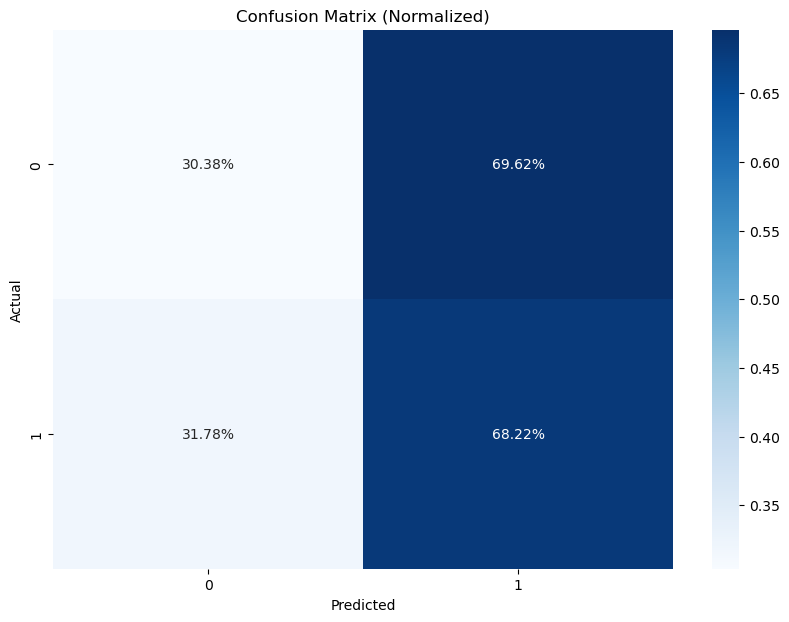

     Actual  Predicted
0       0.0          1
1       1.0          1
2       1.0          1
3       0.0          0
4       1.0          1
..      ...        ...
181     1.0          0
182     1.0          0
183     0.0          0
184     0.0          1
185     1.0          1

[186 rows x 2 columns]


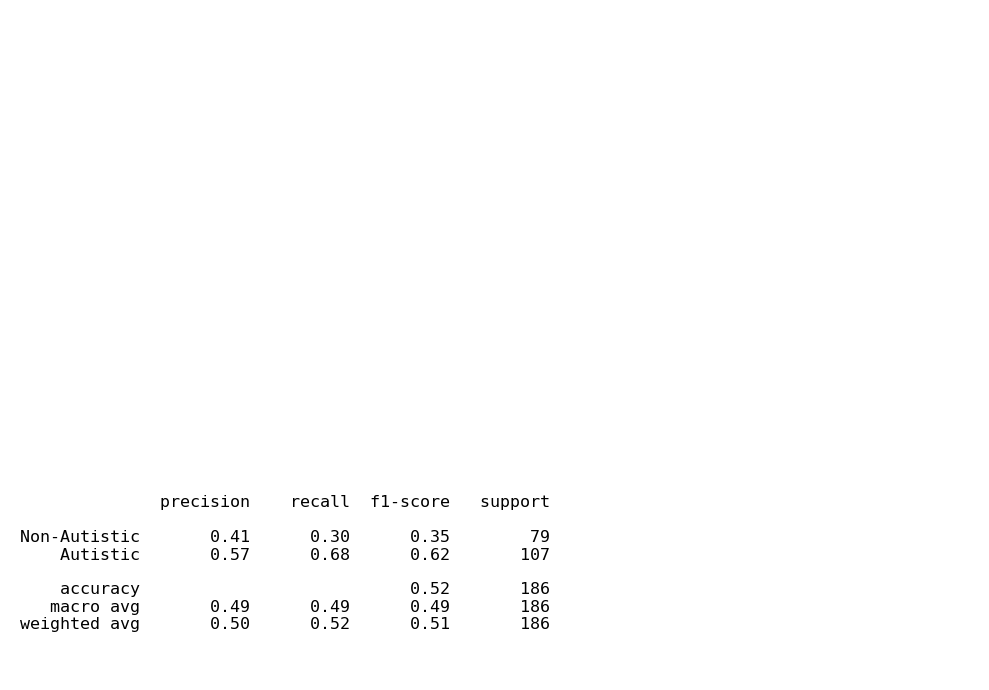

Learning Rate -->  0.001



 50%|█████     | 1/2 [00:04<00:04,  4.80s/it]

Epoch: 1, Loss: 0.6828759881583127



100%|██████████| 2/2 [00:08<00:00,  4.47s/it]


Epoch: 2, Loss: 0.6775585602630269



100%|██████████| 223/223 [08:13<00:00,  2.21s/it]

100%|██████████| 186/186 [16:06<00:00,  5.20s/it]

100%|██████████| 6/6 [00:00<00:00,  6.84it/s]


Test Accuracy: 0.5914


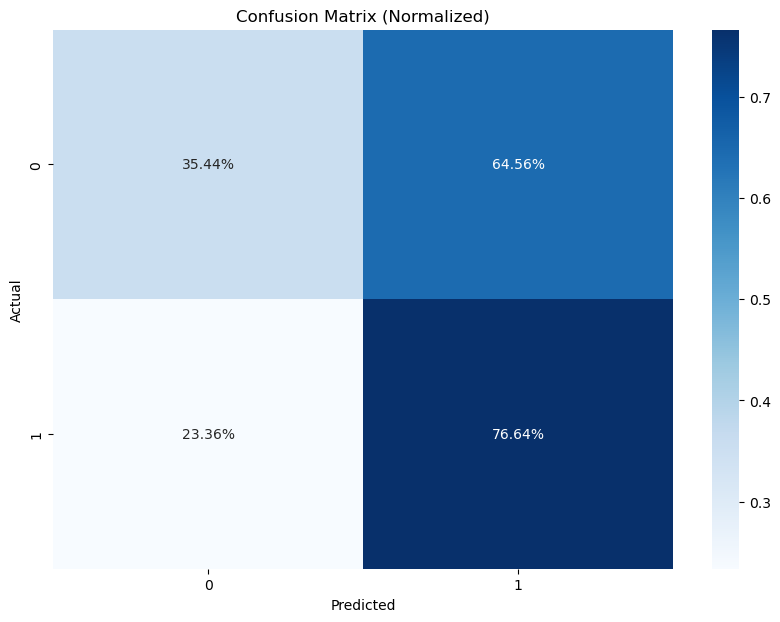

     Actual  Predicted
0       0.0          1
1       1.0          1
2       1.0          1
3       0.0          0
4       1.0          1
..      ...        ...
181     1.0          1
182     1.0          1
183     0.0          0
184     0.0          1
185     1.0          1

[186 rows x 2 columns]


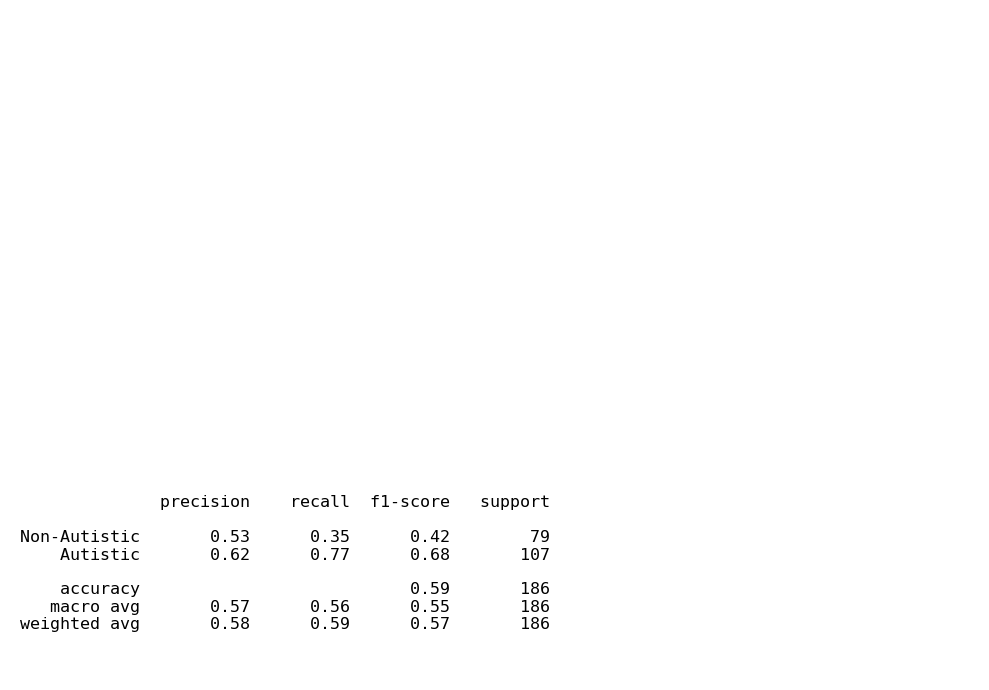

Learning Rate -->  0.0001



 50%|█████     | 1/2 [00:03<00:03,  3.97s/it]

Epoch: 1, Loss: 0.6694826727563684



100%|██████████| 2/2 [00:08<00:00,  4.41s/it]


Epoch: 2, Loss: 0.6713478456843983



100%|██████████| 223/223 [07:52<00:00,  2.12s/it]

100%|██████████| 186/186 [16:07<00:00,  5.20s/it]

100%|██████████| 6/6 [00:00<00:00,  6.14it/s]


Test Accuracy: 0.5968


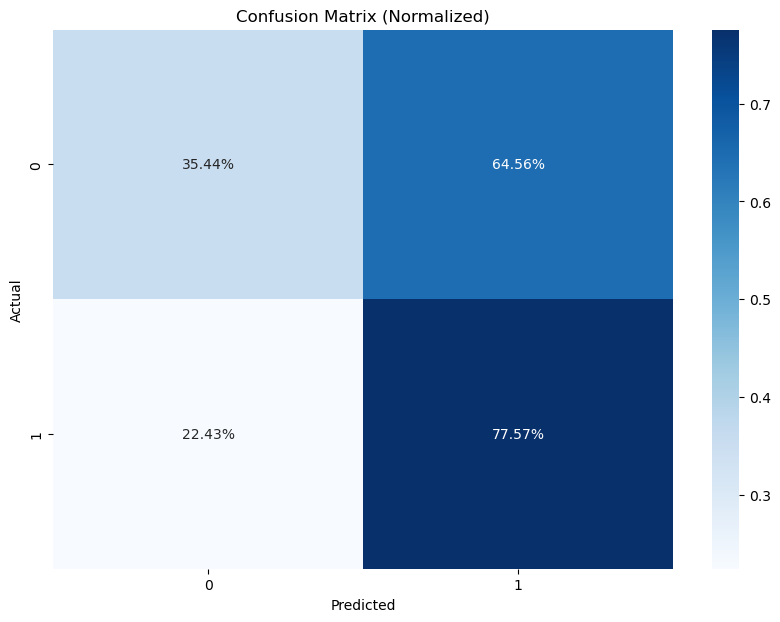

     Actual  Predicted
0       0.0          1
1       1.0          1
2       1.0          1
3       0.0          0
4       1.0          1
..      ...        ...
181     1.0          1
182     1.0          1
183     0.0          0
184     0.0          1
185     1.0          1

[186 rows x 2 columns]


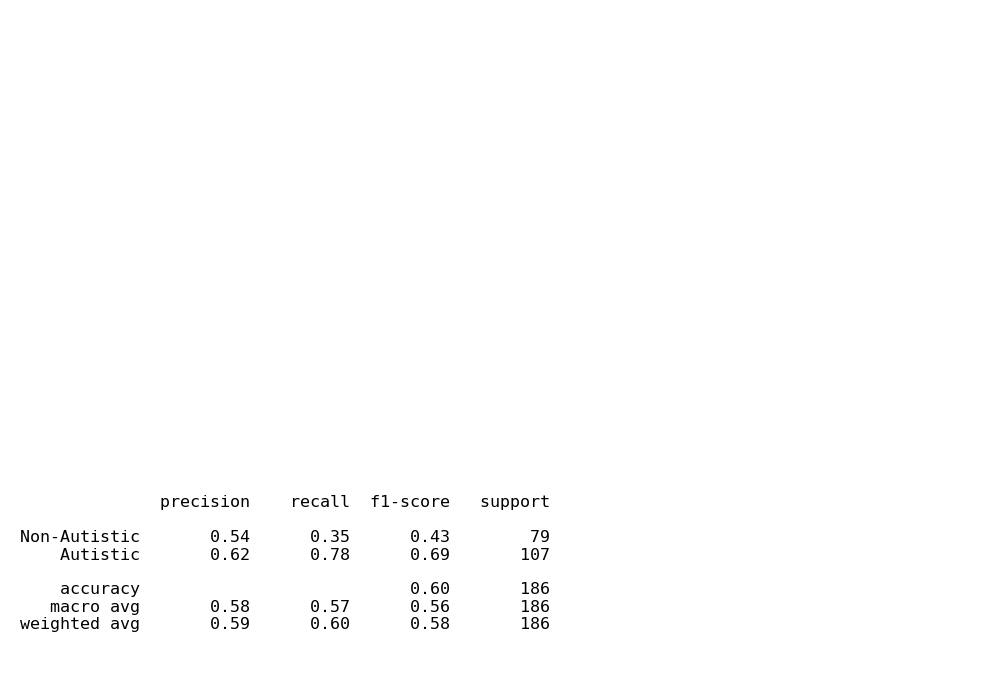

100%|██████████| 1/1 [2:36:32<00:00, 9392.97s/it]

----Final Result----
{'cort-maxprob-thr25-2mm': {'0.0001': {'accuracy': 0.5967741935483871,
                                       'autistic_f1_score': 0.6887966804979254,
                                       'autistic_precision': 0.6194029850746269,
                                       'autistic_recall': 0.7757009345794392,
                                       'autistic_support': 107,
                                       'loss': 0.6713478456843983,
                                       'macro_avg_f1_score': 0.5581387982642299,
                                       'macro_avg_precision': 0.5789322617680827,
                                       'macro_avg_recall': 0.5650656571631374,
                                       'macro_avg_support': 186,
                                       'non_autistic_f1_score': 0.42748091603053434,
                                       'non_autistic_precision': 0.5384615384615384,
                                       'non_autistic_recall':

In [1]:
import pandas as pd
import numpy as np
import nibabel as nib
from nilearn import input_data, datasets
import networkx as nx
from sklearn.model_selection import train_test_split
from torch_geometric.data import Data, DataLoader
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from fastdtw import fastdtw
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from torch.nn import BatchNorm1d, Dropout
import os
from nilearn import plotting
from nilearn import image
import matplotlib.pyplot as plt
import warnings
import pprint
# Ignore all warnings (not recommended unless you know what you are doing)
warnings.filterwarnings("ignore")
from tqdm import tqdm
            


train_data_eda = "dtw_train_eda/"
os.makedirs(train_data_eda, exist_ok=True)

test_result_dir = "dtw_test_result/"
os.makedirs(test_result_dir, exist_ok=True)

# Load the CSV file
csv_file = pd.read_csv(r"/Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/Phenotypic_V1_0b_preprocessed1.csv")
csv_file['DX_GROUP'].replace({1: 0, 2: 1}, inplace=True)
train_df, test_df = train_test_split(csv_file, test_size=0.2, random_state=42)
harvard_oxford_atlas = ['cort-maxprob-thr25-2mm']
'''values = [
    "cort-maxprob-thr0-1mm",
    "cort-maxprob-thr0-2mm",
    "cort-maxprob-thr25-1mm",
    "cort-maxprob-thr25-2mm",
    "cort-maxprob-thr50-1mm",
    "cort-maxprob-thr50-2mm",
    "cort-prob-1mm",
    "cort-prob-2mm",
    "cortl-maxprob-thr0-1mm",
    "cortl-maxprob-thr0-2mm",
    "cortl-maxprob-thr25-1mm",
    "cortl-maxprob-thr25-2mm",
    "cortl-maxprob-thr50-1mm",
    "cortl-maxprob-thr50-2mm",
    "cortl-prob-1mm",
    "cortl-prob-2mm",
    "sub-maxprob-thr0-1mm",
    "sub-maxprob-thr0-2mm",
    "sub-maxprob-thr25-1mm",
    "sub-maxprob-thr25-2mm",
    "sub-maxprob-thr50-1mm",
    "sub-maxprob-thr50-2mm",
    "sub-prob-1mm",
    "sub-prob-2mm"
]'''


results = {}
atlas_threshold = None

for data in tqdm(harvard_oxford_atlas):
    atlas_threshold = data
    print("----Threshold----")
    print(atlas_threshold)
    results[atlas_threshold] = {}
    atlas = datasets.fetch_atlas_harvard_oxford(data)
    masker = input_data.NiftiLabelsMasker(labels_img=atlas.maps, standardize=True)
    mri_dir = r"/Users/vinoth/PycharmProjects/paper_implementation/Dataset/source/mri_images/ABIDE_pcp/cpac/nofilt_noglobal/"

    # Placeholder for Graph Neural Network Data
    graph_data_list = []

    # Data Preprocessing
    for idx, row in tqdm(enumerate(train_df.itertuples()), total=len(train_df)):
        # Combine the parent and nested folder paths
        file_dir = os.path.join(train_data_eda, row.FILE_ID)
        os.makedirs(file_dir, exist_ok=True)
        mri_filename = os.path.join(mri_dir, row.FILE_ID + "_func_preproc.nii.gz")
        
        try:
            mri_img = nib.load(mri_filename)
            
            mri_img_dir = os.path.join(file_dir, 'mri_image')
            os.makedirs(mri_img_dir, exist_ok=True)
            
            # Select the first time point
            first_volume = mri_img.slicer[:,:,:,0]
            
            image_shape = mri_img.shape

            # The total number of volumes in the 4D dimension is the size of the fourth dimension
            total_volumes = image_shape[3]

            #print("Total number of volumes in the 4D image for file " + row.FILE_ID + " : ", total_volumes)

            '''# Plot the image
            plotting.plot_img(first_volume, cmap='gray')  # grayscale often works well for MRIs
            filename = os.path.join(mri_img_dir, row.FILE_ID+'_img.png')
            plt.savefig(filename)
            plt.close()  # Close the plot to avoid overlaps

            # Plot the EPI
            plotting.plot_epi(first_volume, display_mode='z', cut_coords=5, cmap='viridis')  # viridis is a perceptually uniform colormap
            filename = os.path.join(mri_img_dir, row.FILE_ID+'_epi_img.png')
            plt.savefig(filename)
            plt.close()

            # Plot the anatomy
            plotting.plot_anat(first_volume, cmap='gray')  # grayscale again for anatomical images
            filename = os.path.join(mri_img_dir, row.FILE_ID+'_anat_img.png')
            plt.savefig(filename)
            plt.close()

            # Plot the statistical map
            plotting.plot_stat_map(first_volume, bg_img=None, threshold=3.0, cmap='cold_hot')  # cold_hot is often used for stat maps
            filename = os.path.join(mri_img_dir, row.FILE_ID+'_stat_map_img.png')
            plt.savefig(filename)
            plt.close()

            # Plot the probabilistic atlas
            plotting.plot_prob_atlas(mri_img, bg_img=None, colorbar=True)  # default colormap should work for probabilistic atlas
            filename = os.path.join(mri_img_dir, row.FILE_ID+'_atlas_map_img.png')
            plt.savefig(filename)
            plt.close()'''
            
            time_series = masker.fit_transform(mri_img)
            n_regions, n_time_points = time_series.shape
            '''print("****************************")
            print(row.FILE_ID, " --> ", "n_regions --> ", n_regions, "n_time_points --> ", n_time_points)
            print("****************************")'''
            distance_matrix = np.zeros((n_regions, n_regions))
            for i in range(n_regions):
                for j in range(i + 1, n_regions):
                    distance, _ = fastdtw(time_series[i, :], time_series[j, :])
                    distance_matrix[i, j] = distance_matrix[j, i] = distance
            distance_matrix = distance_matrix / distance_matrix.max()
            similarity_matrix = 1 - distance_matrix
            threshold = 0.3
            similarity_matrix[similarity_matrix < threshold] = 0
            G = nx.from_numpy_matrix(similarity_matrix)

            '''if idx == 0:  # Only for the first iteration
                # Plot the time series for the regions
                plt.figure(figsize=(35, 15))
                for i in range(min(n_regions, time_series.shape[0])):
                    plt.plot(time_series[i, :], label=f'Region {i + 1}')
                plt.xlabel('Time point')
                plt.ylabel('Blood Oxygen Level(BOLD) - Normalized signal')
                plt.title('Time series of the regions')
                plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
                plt.tight_layout()
            
                # Save the plot to the existing folder
                time_series_filename = row.FILE_ID+'_'+'time_series_plot.png'
                
                plt.savefig(os.path.join(file_dir, time_series_filename))
                
                plt.figure(figsize=(10, 10))
                sns.heatmap(similarity_matrix, annot=False, cmap='turbo')
                plt.title('Similarity Matrix')
                similarity_matrix_adj_img_filename = row.FILE_ID + '_similarity_matrix.png'
                plt.savefig(os.path.join(file_dir, similarity_matrix_adj_img_filename))
                plt.close() # Close the plot
                similarity_matrix_npy_filename = row.FILE_ID + '_similarity_matrix.npy'
                similarity_matrix_npy_path = os.path.join(file_dir, similarity_matrix_npy_filename)
                np.save(similarity_matrix_npy_path, similarity_matrix)

                # Visualize the graph
                plt.figure(figsize=(45, 25))
                pos = nx.spring_layout(G)

                # Extract the edge weights from the graph
                weights = [G[u][v].get('weight', 1) for u, v in G.edges()]

                # Normalize the weights to fit your desired range of thickness
                normalized_weights = [5 * weight / max(weights) for weight in weights]

                # Draw the edges with the thickness determined by the normalized weights
                nx.draw_networkx_edges(G, pos, width=normalized_weights)

                # Draw the nodes and labels
                nx.draw_networkx_nodes(G, pos)
                nx.draw_networkx_labels(G, pos)
                
                # Define the path and filename where you want to save the plot
                graph_plot_filename = row.FILE_ID + '_graph_plot.png'
                graph_plot_path = os.path.join(file_dir, graph_plot_filename)

                # Save the plot to the specified path
                plt.savefig(graph_plot_path'''

            edge_index = torch.tensor(list(G.edges), dtype=torch.long)
            x = torch.tensor(time_series, dtype=torch.float)
            y = torch.tensor([row.DX_GROUP], dtype=torch.float)
            data = Data(x=x, edge_index=edge_index.t().contiguous(), y=y)
            graph_data_list.append(data)
        except FileNotFoundError:
            pass

    # Neural Network Model with Regularization, Batch Normalization, and Dropout
    class Net(torch.nn.Module):
        def __init__(self, num_node_features, num_classes):
            super(Net, self).__init__()
            self.conv1 = GCNConv(num_node_features, 16)
            self.bn1 = BatchNorm1d(16)
            self.conv2 = GCNConv(16, 32)
            self.bn2 = BatchNorm1d(32)
            self.fc = torch.nn.Linear(32, num_classes)
            self.dropout = Dropout(0.5)

        def forward(self, data):
            x, edge_index, batch = data.x, data.edge_index, data.batch
            x = self.conv1(x, edge_index)
            x = self.bn1(x)
            x = F.relu(x)
            x = self.dropout(x)
            x = self.conv2(x, edge_index)
            x = self.bn2(x)
            x = global_mean_pool(x, batch)
            x = self.fc(x)
            return F.log_softmax(x, dim=1)

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    num_features = graph_data_list[0].num_node_features
    num_classes = 2
    model = Net(num_features, num_classes).to(device)
    loader = DataLoader(graph_data_list, batch_size=32, shuffle=True)
    
    # Hyperparameter Tuning (Example: Adjusting Learning Rate)
    learning_rates = [0.01, 0.001, 0.0001]
    l_rate = None
    for lr in learning_rates:
        l_rate = str(lr)
        results[atlas_threshold][l_rate] = {}
        print("Learning Rate --> ", lr)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4) # L2 Regularization
        for epoch in tqdm(range(2)):
            total_loss = 0
            model.train()
            for data in loader:
                data = data.to(device)
                optimizer.zero_grad()
                out = model(data)
                loss = F.nll_loss(out, data.y.long())
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            print(f'Epoch: {epoch+1}, Loss: {total_loss/len(loader)}')
        results[atlas_threshold][l_rate]['loss'] = total_loss/len(loader)

        # Placeholder for time series data
        time_series_list = []
        successful_indices = []

        # Testing Data Preprocessing
        # for idx, row in enumerate(test_df.itertuples()):
        for idx, row in tqdm(enumerate(test_df.itertuples()), total=len(test_df)):
            '''if idx == 2:
                break'''
            mri_filename = os.path.join(mri_dir, row.FILE_ID + "_func_preproc.nii.gz")
            try:
                mri_img = nib.load(mri_filename)
                time_series = masker.fit_transform(mri_img)
                time_series_list.append(time_series)
                successful_indices.append(idx)
            except FileNotFoundError:
                pass

        
        # Placeholder for Graph Neural Network Data for testing
        graph_data_test_list = []

        #for idx, successful_idx in tqdm(enumerate(successful_indices, total=len(successful_indices))):
        for idx, successful_idx in tqdm(enumerate(successful_indices), total=len(successful_indices)):
            row = test_df.iloc[successful_idx]
            time_series = time_series_list[idx]
            n_regions = time_series.shape[0]
            distance_matrix = np.zeros((n_regions, n_regions))
            for i in range(n_regions):
                for j in range(i + 1, n_regions):
                    distance, _ = fastdtw(time_series[i, :], time_series[j, :])
                    distance_matrix[i, j] = distance_matrix[j, i] = distance
            distance_matrix = distance_matrix / distance_matrix.max()
            similarity_matrix = 1 - distance_matrix
            threshold = 0.3
            similarity_matrix[similarity_matrix < threshold] = 0
            G = nx.from_numpy_matrix(similarity_matrix)
            edge_index = torch.tensor(list(G.edges), dtype=torch.long)
            x = torch.tensor(time_series, dtype=torch.float)
            y = torch.tensor([row.DX_GROUP], dtype=torch.float)
            data = Data(x=x, edge_index=edge_index.t().contiguous(), y=y)
            graph_data_test_list.append(data)

        # Create a data loader for testing data
        test_loader = DataLoader(graph_data_test_list, batch_size=32, shuffle=False)

        # Testing
        model.eval()
        correct = 0
        all_preds = []
        all_labels = []

        for data in tqdm(test_loader):
            data = data.to(device)
            with torch.no_grad():
                output = model(data)
                _, pred = output.max(dim=1)
            all_preds.append(pred.cpu().numpy())
            all_labels.append(data.y.cpu().numpy())
            correct += int((pred == data.y.long()).sum())

        accuracy = correct / len(test_loader.dataset)

        print(f'Test Accuracy: {accuracy:.4f}')
        
        results[atlas_threshold][l_rate]['accuracy'] = accuracy

        # Flatten the list of predictions and labels
        all_preds = np.concatenate(all_preds)
        all_labels = np.concatenate(all_labels)
        
        # Specify the parent folder
        parent_folder = test_result_dir

        # Specify the nested folder names
        nested_folder1 = atlas_threshold
        nested_folder2 = 'learning_rate_'+l_rate
        
        # Combine the parent and nested folder pa'hs
        validation_result_dir = os.path.join(parent_folder, nested_folder1, nested_folder2)
        
        # Create the nested folders, including any necessary parent directories
        os.makedirs(validation_result_dir, exist_ok=True)

        # Confusion Matrix
        cm = confusion_matrix(all_labels, all_preds)
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize

        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2%")
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix (Normalized)')
        
        # Save the image inside the nested folder
        plt.savefig(os.path.join(validation_result_dir, 'confusion_matrix.png'))
        
        plt.show()

        # Print actual vs predicted
        actual_vs_predicted = pd.DataFrame({'Actual': all_labels, 'Predicted': all_preds})
        print(actual_vs_predicted)

        # Classification report
        report = classification_report(all_labels, all_preds, target_names=['Non-Autistic', 'Autistic'], output_dict=True)
        #print(classification_report(all_labels, all_preds, target_names=['Non-Autistic', 'Autistic']))
        report_text = classification_report(all_labels, all_preds, target_names=['Non-Autistic', 'Autistic'])

        plt.figure(figsize=(10, 7))
        plt.text(0.01, 0.05, report_text, {'fontsize': 12}, fontproperties='monospace') # Adjust text size and position accordingly
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(os.path.join(validation_result_dir, 'classification_report.png'))
        plt.show()
        
        with open(os.path.join(validation_result_dir, 'classification_report.txt'), 'w') as file:
            file.write(report_text)
  
        # Individual class metrics
        # Access individual values
        non_autistic_precision = report['Non-Autistic']['precision']
        autistic_precision = report['Autistic']['precision']

        non_autistic_recall = report['Non-Autistic']['recall']
        autistic_recall = report['Autistic']['recall']

        non_autistic_f1_score = report['Non-Autistic']['f1-score']
        autistic_f1_score = report['Autistic']['f1-score']

        non_autistic_support = report['Non-Autistic']['support']
        autistic_support = report['Autistic']['support']

        '''# Aggregated metrics
        accuracy = report['accuracy'''

        macro_avg_precision = report['macro avg']['precision']
        weighted_avg_precision = report['weighted avg']['precision']

        macro_avg_recall = report['macro avg']['recall']
        weighted_avg_recall = report['weighted avg']['recall']

        macro_avg_f1_score = report['macro avg']['f1-score']
        weighted_avg_f1_score = report['weighted avg']['f1-score']

        macro_avg_support = report['macro avg']['support']
        weighted_avg_support = report['weighted avg']['support']
        
        results[atlas_threshold][l_rate]['non_autistic_precision'] = non_autistic_precision
        results[atlas_threshold][l_rate]['autistic_precision'] = autistic_precision
        results[atlas_threshold][l_rate]['non_autistic_recall'] = non_autistic_recall
        results[atlas_threshold][l_rate]['autistic_recall'] = autistic_recall
        results[atlas_threshold][l_rate]['non_autistic_f1_score'] = non_autistic_f1_score
        results[atlas_threshold][l_rate]['autistic_f1_score'] = autistic_f1_score
        results[atlas_threshold][l_rate]['non_autistic_support'] = non_autistic_support
        results[atlas_threshold][l_rate]['autistic_support'] = autistic_support
        results[atlas_threshold][l_rate]['macro_avg_precision'] = macro_avg_precision
        results[atlas_threshold][l_rate]['weighted_avg_precision'] = weighted_avg_precision
        results[atlas_threshold][l_rate]['macro_avg_recall'] = macro_avg_recall
        results[atlas_threshold][l_rate]['weighted_avg_recall'] = weighted_avg_recall
        results[atlas_threshold][l_rate]['macro_avg_f1_score'] = macro_avg_f1_score
        results[atlas_threshold][l_rate]['weighted_avg_f1_score'] = weighted_avg_f1_score
        results[atlas_threshold][l_rate]['macro_avg_support'] = macro_avg_support
        results[atlas_threshold][l_rate]['weighted_avg_support'] = weighted_avg_support
        
        atlas = None
        l_rate = None
        
print("----Final Result----")
pprint.pprint(results)

sorted_data = [(key, subkey, values['accuracy']) for key, subdata in results.items() for subkey, values in subdata.items()]
sorted_data.sort(key=lambda x: x[2], reverse=True)

print("----Sorted Accuracy----")
for key, subkey, accuracy in sorted_data:
    print(f"Key: {key}, Subkey: {subkey}, Accuracy: {accuracy}")
    
# Create a list of tuples containing key, subkey, and corresponding details
sorted_data = [(key, subkey, values) for key, subdata in results.items() for subkey, values in subdata.items()]

# Sort the list based on the accuracy
sorted_data.sort(key=lambda x: x[2]['accuracy'], reverse=True)

# Create a new dictionary with the sorted order
sorted_data_dict = {f"{key}-{subkey}": values for key, subkey, values in sorted_data}
print("----Sorted Dict----")
pprint.pprint(sorted_data_dict)



In [49]:

sorted_data = [(key, subkey, values['accuracy']) for key, subdata in results.items() for subkey, values in subdata.items()]
sorted_data.sort(key=lambda x: x[2], reverse=True)

for key, subkey, accuracy in sorted_data:
    print(f"Key: {key}, Subkey: {subkey}, Accuracy: {accuracy}")


Key: cort-maxprob-thr25-2mm, Subkey: 0.01, Accuracy: 0.5
Key: cort-maxprob-thr25-2mm, Subkey: 0.001, Accuracy: 0.5
Key: cort-maxprob-thr25-2mm, Subkey: 0.0001, Accuracy: 0.5
Key: sub-maxprob-thr0-1mm, Subkey: 0.01, Accuracy: 0.5
Key: sub-maxprob-thr0-1mm, Subkey: 0.001, Accuracy: 0.5
Key: sub-maxprob-thr0-1mm, Subkey: 0.0001, Accuracy: 0.5


In [51]:

# Create a list of tuples containing key, subkey, and corresponding details
sorted_data = [(key, subkey, values) for key, subdata in results.items() for subkey, values in subdata.items()]

# Sort the list based on the accuracy
sorted_data.sort(key=lambda x: x[2]['accuracy'], reverse=True)

# Create a new dictionary with the sorted order
sorted_data_dict = {f"{key}-{subkey}": values for key, subkey, values in sorted_data}
pprint.pprint(sorted_data_dict)

'''# Print the sorted dictionary
for key, values in sorted_data_dict.items():
    print(f"Key: {key}")
    print(f"Values: {values}")
    print()  # Adding a newline for better readability'''


{'cort-maxprob-thr25-2mm-0.0001': {'accuracy': 0.5,
                                   'autistic_f1_score': 0.0,
                                   'autistic_precision': 0.0,
                                   'autistic_recall': 0.0,
                                   'autistic_support': 1,
                                   'loss': 0.21887578070163727,
                                   'macro_avg_f1_score': 0.3333333333333333,
                                   'macro_avg_precision': 0.25,
                                   'macro_avg_recall': 0.5,
                                   'macro_avg_support': 2,
                                   'non_autistic_f1_score': 0.6666666666666666,
                                   'non_autistic_precision': 0.5,
                                   'non_autistic_recall': 1.0,
                                   'non_autistic_support': 1,
                                   'weighted_avg_f1_score': 0.3333333333333333,
                                 

In [46]:
# Convert the nested dictionary into a flat list of rows
rows = []
for atlas, atlas_data in results.items():
    for lr, metrics in atlas_data.items():
        row = {'atlas': atlas, 'learning_rate': lr}
        row.update(metrics)
        rows.append(row)

# Create a DataFrame from the rows
df = pd.DataFrame(rows)

# Display the DataFrame
print(df)

                    atlas learning_rate      loss  accuracy  \
0  cort-maxprob-thr25-2mm          0.01  0.306042       0.5   
1  cort-maxprob-thr25-2mm         0.001  0.179666       0.5   
2  cort-maxprob-thr25-2mm        0.0001  0.155944       1.0   

   non_autistic_precision  autistic_precision  non_autistic_recall  \
0                     0.5                 0.0                  1.0   
1                     0.5                 0.0                  1.0   
2                     1.0                 1.0                  1.0   

   autistic_recall  non_autistic_f1_score  autistic_f1_score  \
0              0.0               0.666667                0.0   
1              0.0               0.666667                0.0   
2              1.0               1.000000                1.0   

   non_autistic_support  autistic_support  macro_avg_precision  \
0                     1                 1                 0.25   
1                     1                 1                 0.25   
2          

In [43]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_preds, target_names=['Non-Autistic', 'Autistic'], output_dict=True)

pprint.pprint(report)

# Individual class metrics
# Access individual values
non_autistic_precision = report['Non-Autistic']['precision']
autistic_precision = report['Autistic']['precision']

non_autistic_recall = report['Non-Autistic']['recall']
autistic_recall = report['Autistic']['recall']

non_autistic_f1_score = report['Non-Autistic']['f1-score']
autistic_f1_score = report['Autistic']['f1-score']

non_autistic_support = report['Non-Autistic']['support']
autistic_support = report['Autistic']['support']

# Aggregated metrics
accuracy = report['accuracy']

macro_avg_precision = report['macro avg']['precision']
weighted_avg_precision = report['weighted avg']['precision']

macro_avg_recall = report['macro avg']['recall']
weighted_avg_recall = report['weighted avg']['recall']

macro_avg_f1_score = report['macro avg']['f1-score']
weighted_avg_f1_score = report['weighted avg']['f1-score']

macro_avg_support = report['macro avg']['support']
weighted_avg_support = report['weighted avg']['support']


print("Accuracy:", accuracy)

print("Non-Autistic Precision:", non_autistic_precision)
print("Autistic Precision:", autistic_precision)

print("Non-Autistic Recall:", non_autistic_recall)
print("Autistic Recall:", autistic_recall)

print("Non-Autistic F1-Score:", non_autistic_f1_score)
print("Autistic F1-Score:", autistic_f1_score)

print("Non-Autistic Support:", non_autistic_support)
print("Autistic Support:", autistic_support)

print("Macro Average Precision:", macro_avg_precision)
print("Weighted Average Precision:", weighted_avg_precision)

print("Macro Average Recall:", macro_avg_recall)
print("Weighted Average Recall:", weighted_avg_recall)

print("Macro Average F1-Score:", macro_avg_f1_score)
print("Weighted Average F1-Score:", weighted_avg_f1_score)

print("Macro Average Support:", macro_avg_support)
print("Weighted Average Support:", weighted_avg_support)


{'Autistic': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 1},
 'Non-Autistic': {'f1-score': 1.0,
                  'precision': 1.0,
                  'recall': 1.0,
                  'support': 1},
 'accuracy': 1.0,
 'macro avg': {'f1-score': 1.0, 'precision': 1.0, 'recall': 1.0, 'support': 2},
 'weighted avg': {'f1-score': 1.0,
                  'precision': 1.0,
                  'recall': 1.0,
                  'support': 2}}
Accuracy: 1.0
Non-Autistic Precision: 1.0
Autistic Precision: 1.0
Non-Autistic Recall: 1.0
Autistic Recall: 1.0
Non-Autistic F1-Score: 1.0
Autistic F1-Score: 1.0
Non-Autistic Support: 1
Autistic Support: 1
Macro Average Precision: 1.0
Weighted Average Precision: 1.0
Macro Average Recall: 1.0
Weighted Average Recall: 1.0
Macro Average F1-Score: 1.0
Weighted Average F1-Score: 1.0
Macro Average Support: 2
Weighted Average Support: 2
